# Decision Tree

### Import required libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load Dataset

In [56]:
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")
user_details_data.head()

,user_id,display_name,reputation,profile_image,user_type,link,account_id,is_employee,last_modified_date,last_access_date,...,reputation_change_week,reputation_change_day,creation_date,accept_rate,badge_bronze,badge_silver,badge_gold,account_age_days,account_age_years,age_group
0,109,Kalid,22690,https://www.gravatar.com/avatar/5117b4aacf8b64...,registered,https://stackoverflow.com/users/109/kalid,91,False,2025-01-17 19:05:00,2015-10-10 21:32:52,...,10,0,2008-08-02 00:20:47,88.0,46,45,14,6029,16.5,15-18 Years
1,347807,CristiC,22688,https://www.gravatar.com/avatar/6023ac67694f90...,registered,https://stackoverflow.com/users/347807/cristic,141059,False,2024-04-09 05:40:03,2025-01-23 03:52:19,...,10,0,2010-05-22 13:10:40,96.0,89,61,13,5370,14.7,12-15 Years
2,3427777,fantabolous,22686,https://www.gravatar.com/avatar/34dac9c01fc709...,registered,https://stackoverflow.com/users/3427777/fantab...,4096755,False,2024-10-25 20:10:00,2024-12-09 04:11:00,...,0,0,2014-03-17 06:40:33,80.0,52,57,8,3976,10.9,10-12 Years
3,1858116,Gabriele Santomaggio,22682,https://i.sstatic.net/fQDZf.jpg?s=256,registered,https://stackoverflow.com/users/1858116/gabrie...,2087535,False,2023-12-25 15:00:00,2025-01-27 14:19:21,...,0,0,2012-11-27 23:02:03,78.0,59,58,4,4450,12.2,12-15 Years
4,13767,Rafał Rawicki,22680,https://www.gravatar.com/avatar/b043ead577679f...,registered,https://stackoverflow.com/users/13767/rafa%c5%...,7838,False,2024-05-08 11:00:00,2023-07-05 09:38:01,...,0,0,2008-09-16 20:48:13,88.0,79,63,5,5983,16.4,15-18 Years


# Expertise Levels from Reputation

In [57]:
expertise_labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
user_details_data['expertise_level'] = pd.qcut(
    user_details_data['reputation'], q=4, labels=expertise_labels
)

# Drop Unnecessary Columns

In [58]:
columns_to_drop = [
    'user_id',               
    'display_name',         
    'reputation',           
    'profile_image',        
    'link',               
    'account_id',           
    'last_modified_date',  
    'last_access_date',     
    'creation_date',  
    'reputation_change_day', 
    'reputation_change_week',
    'account_age_years', 
    'is_employee'  
]
user_details_data.drop(columns=columns_to_drop, inplace=True)


# Handle Missing and Categorical Data

In [59]:
missing_values = user_details_data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


# Encode the Target Variable

In [60]:
label_encoder = LabelEncoder()
user_details_data['expertise_encoded'] = label_encoder.fit_transform(
    user_details_data['expertise_level']
)

# Define Features (X) and Target (y)

In [61]:
X = user_details_data.drop(columns=['expertise_level', 'expertise_encoded'])
y = user_details_data['expertise_encoded']

# Check Data Types

In [62]:
print("Non-numeric columns in X:")
print(X.select_dtypes(include=['object']).columns)

Non-numeric columns in X:
Index(['user_type', 'age_group'], dtype='object')


# Encode Remaining Object Columns

In [63]:
for col in X.select_dtypes(include=['object']).columns:
    print(f"Encoding column: {col}")
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

Encoding column: user_type
Encoding column: age_group


# Split the Dataset

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

keeping 20% of the data for testing and ensure each class is proportionally represented using stratify.

# DT Model 1 – GINI (All Features, Default Settings, max_depth=3)

DT Model 1 - GINI Accuracy: 0.4572

Classification Report:

              precision    recall  f1-score   support

    Advanced       0.32      0.40      0.36      5239
    Beginner       0.43      0.70      0.53      5244
      Expert       0.63      0.74      0.68      5240
Intermediate       0.00      0.00      0.00      5237

    accuracy                           0.46     20960
   macro avg       0.35      0.46      0.39     20960
weighted avg       0.35      0.46      0.39     20960



/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


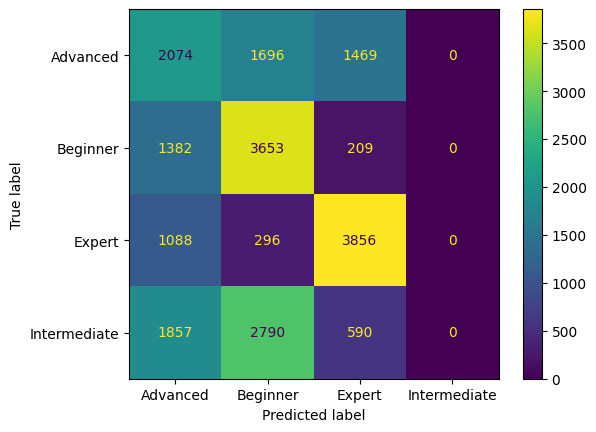

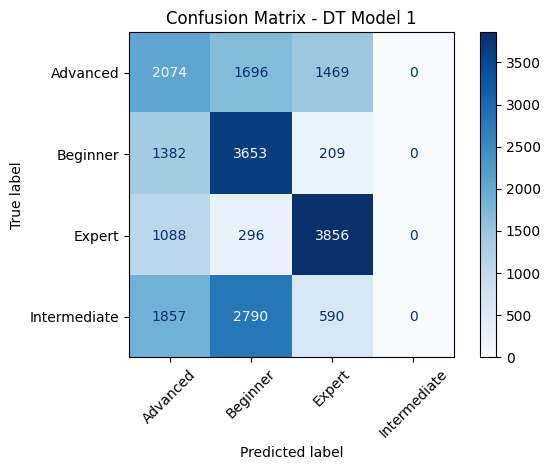

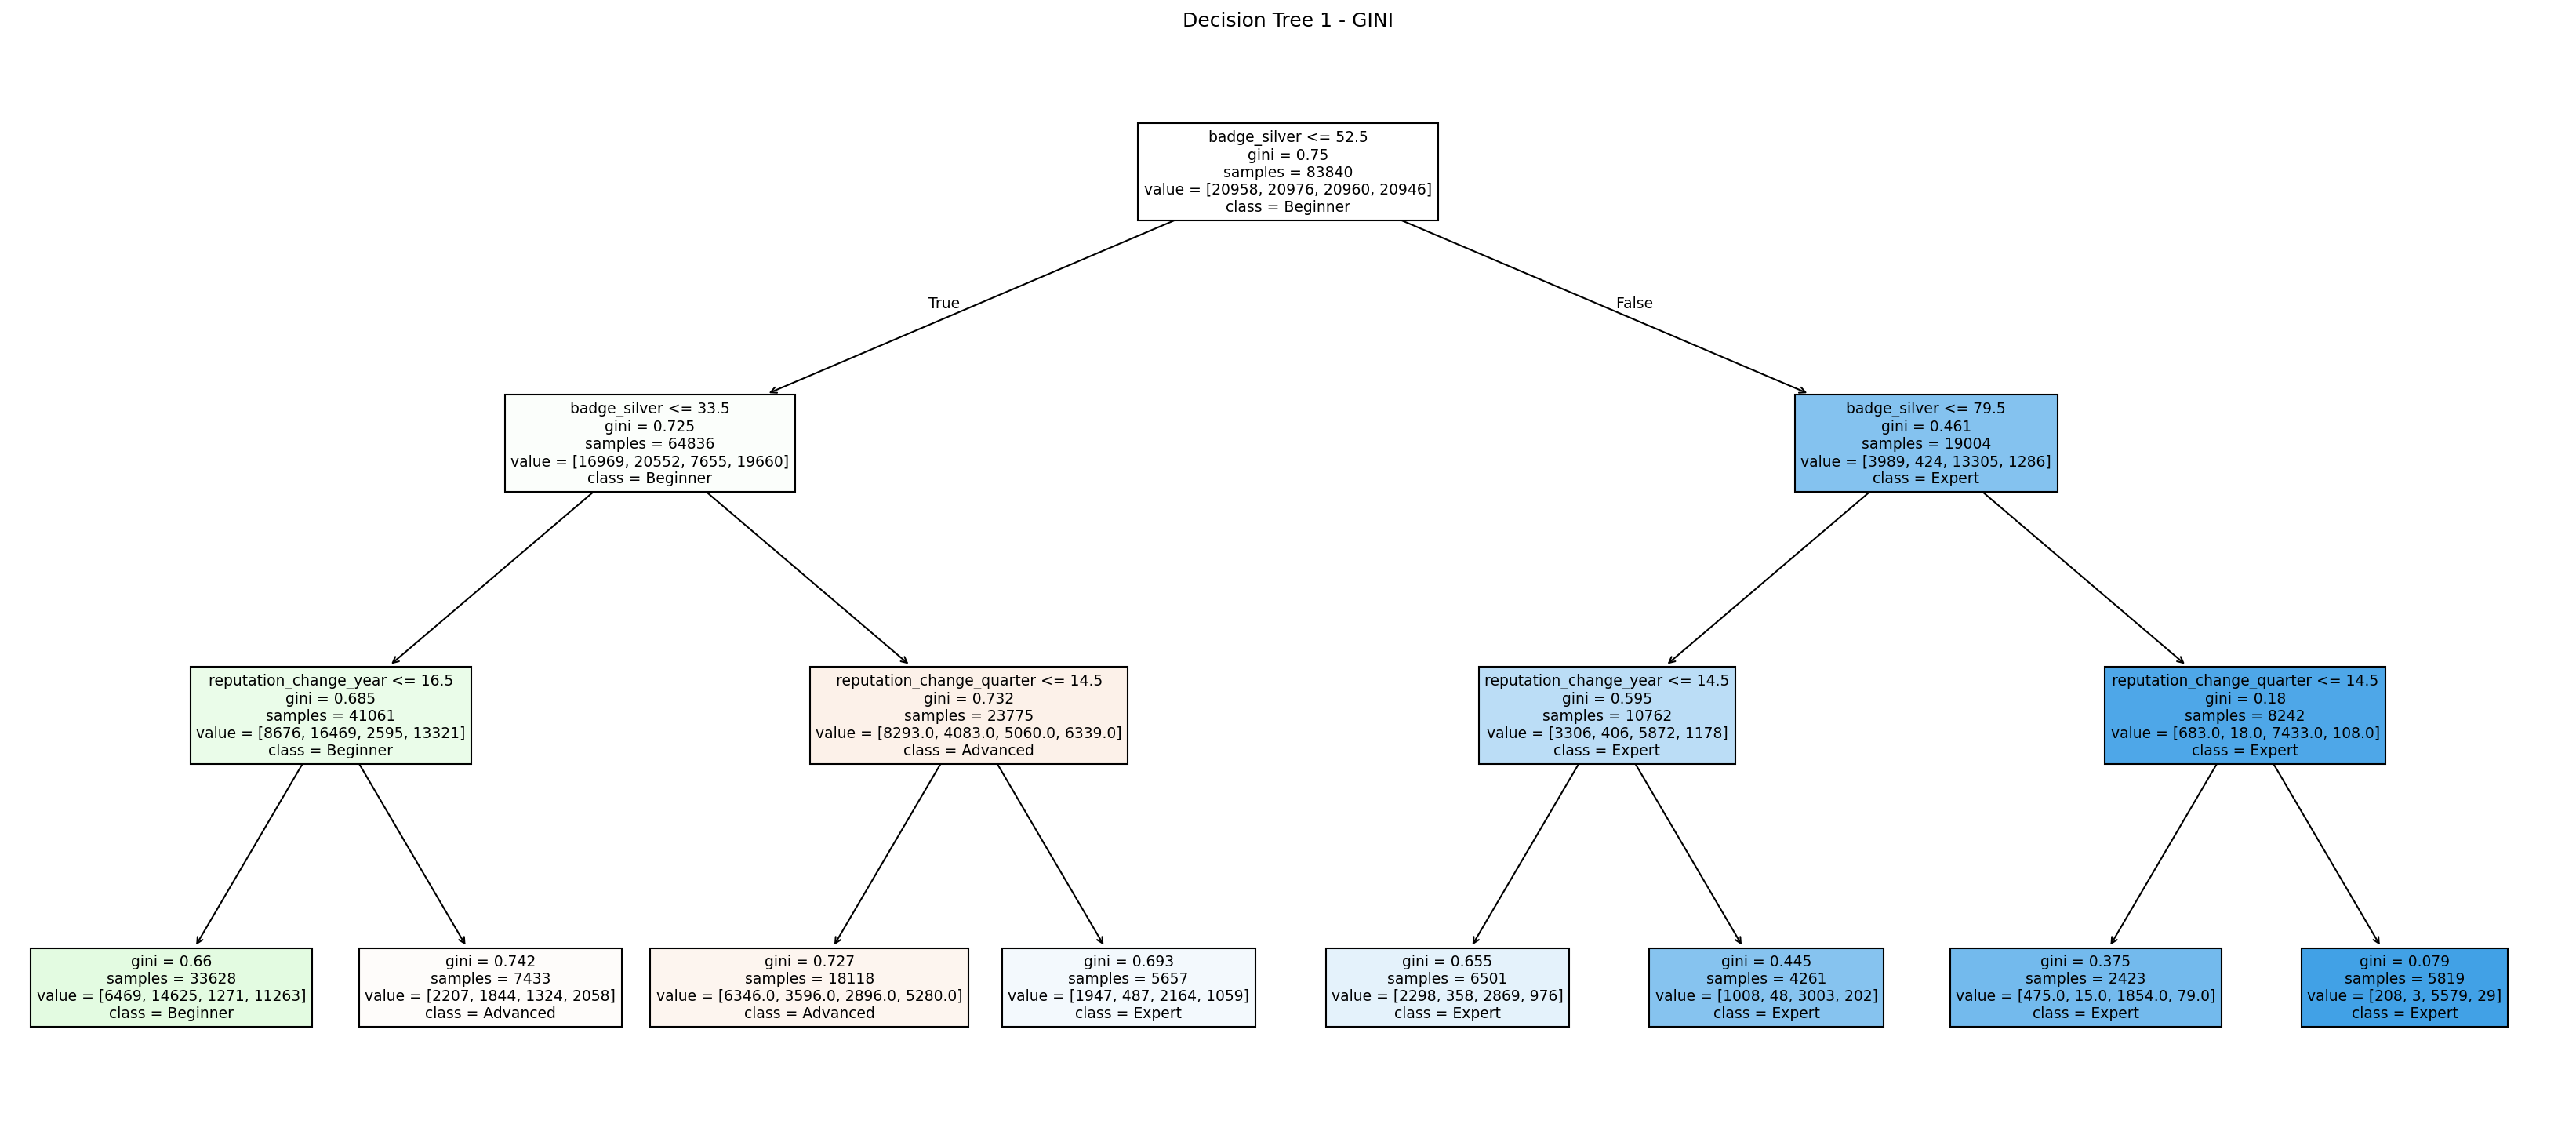

In [65]:
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
print(f"DT Model 1 - GINI Accuracy: {acc1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred1, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_estimator(
    clf1, X_test, y_test, display_labels=label_encoder.classes_
).plot(cmap="Blues")
plt.title("Confusion Matrix - DT Model 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(28, 12), dpi=150)
plot_tree(clf1, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, max_depth=3)
plt.title("Decision Tree 1 - GINI")
plt.show()

Decision Tree Model 1 was built using the GINI criterion with a maximum depth of 3 and all available features. The model achieved an overall accuracy of 45.72%, showing moderate performance. It was able to identify Beginner users quite well, with a high recall, and also performed reasonably on the Expert category with good precision and recall. However, it struggled significantly with the Intermediate class, failing to predict it entirely. The Advanced class had some correct predictions but also a fair number of misclassifications.

Looking at the confusion matrix, it’s clear that most predictions fell into the Beginner and Expert categories, while Intermediate users were often misclassified. This could be due to feature overlap or the limited depth of the tree. The model chose badge_silver as the root node, indicating it was the most important feature for the first split, followed by reputation-related metrics. While the model is simple and easy to interpret, the limited depth may have prevented it from capturing more detailed patterns, especially in the mid-level expertise groups. Overall, the model gives a good starting point for understanding how certain features relate to user expertise, but there’s room for improvement in handling more ambiguous classes.

# DT Model 2 – GINI (Drop Root Feature from Tree 1)

In [66]:
# Get root feature from clf1
root1 = X.columns[clf1.tree_.feature[0]]
print(f"Root feature of Tree 1: {root1}")

Root feature of Tree 1: badge_silver


DT Model 2 - GINI Accuracy: 0.4302

Classification Report:

              precision    recall  f1-score   support

    Advanced       0.30      0.40      0.34      5239
    Beginner       0.44      0.57      0.50      5244
      Expert       0.54      0.75      0.63      5240
Intermediate       0.00      0.00      0.00      5237

    accuracy                           0.43     20960
   macro avg       0.32      0.43      0.37     20960
weighted avg       0.32      0.43      0.37     20960



/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


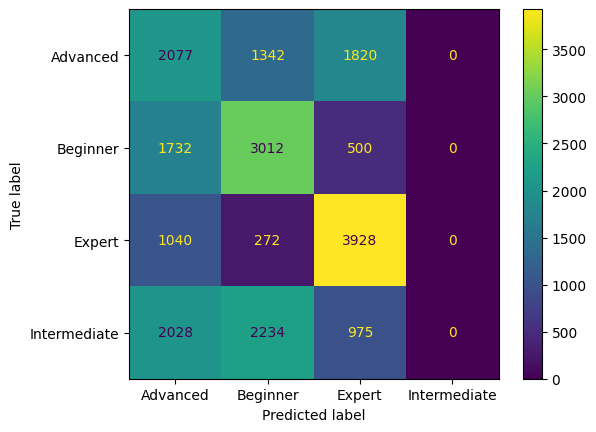

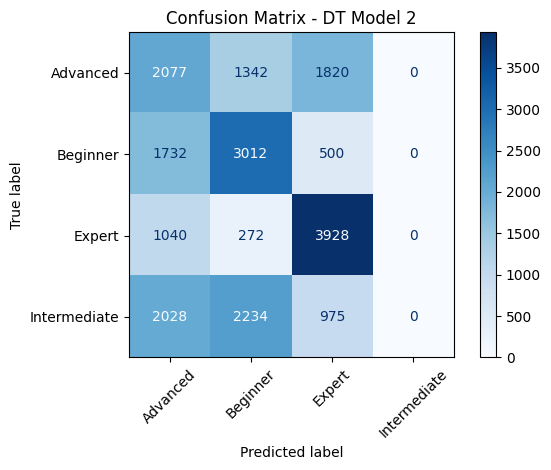

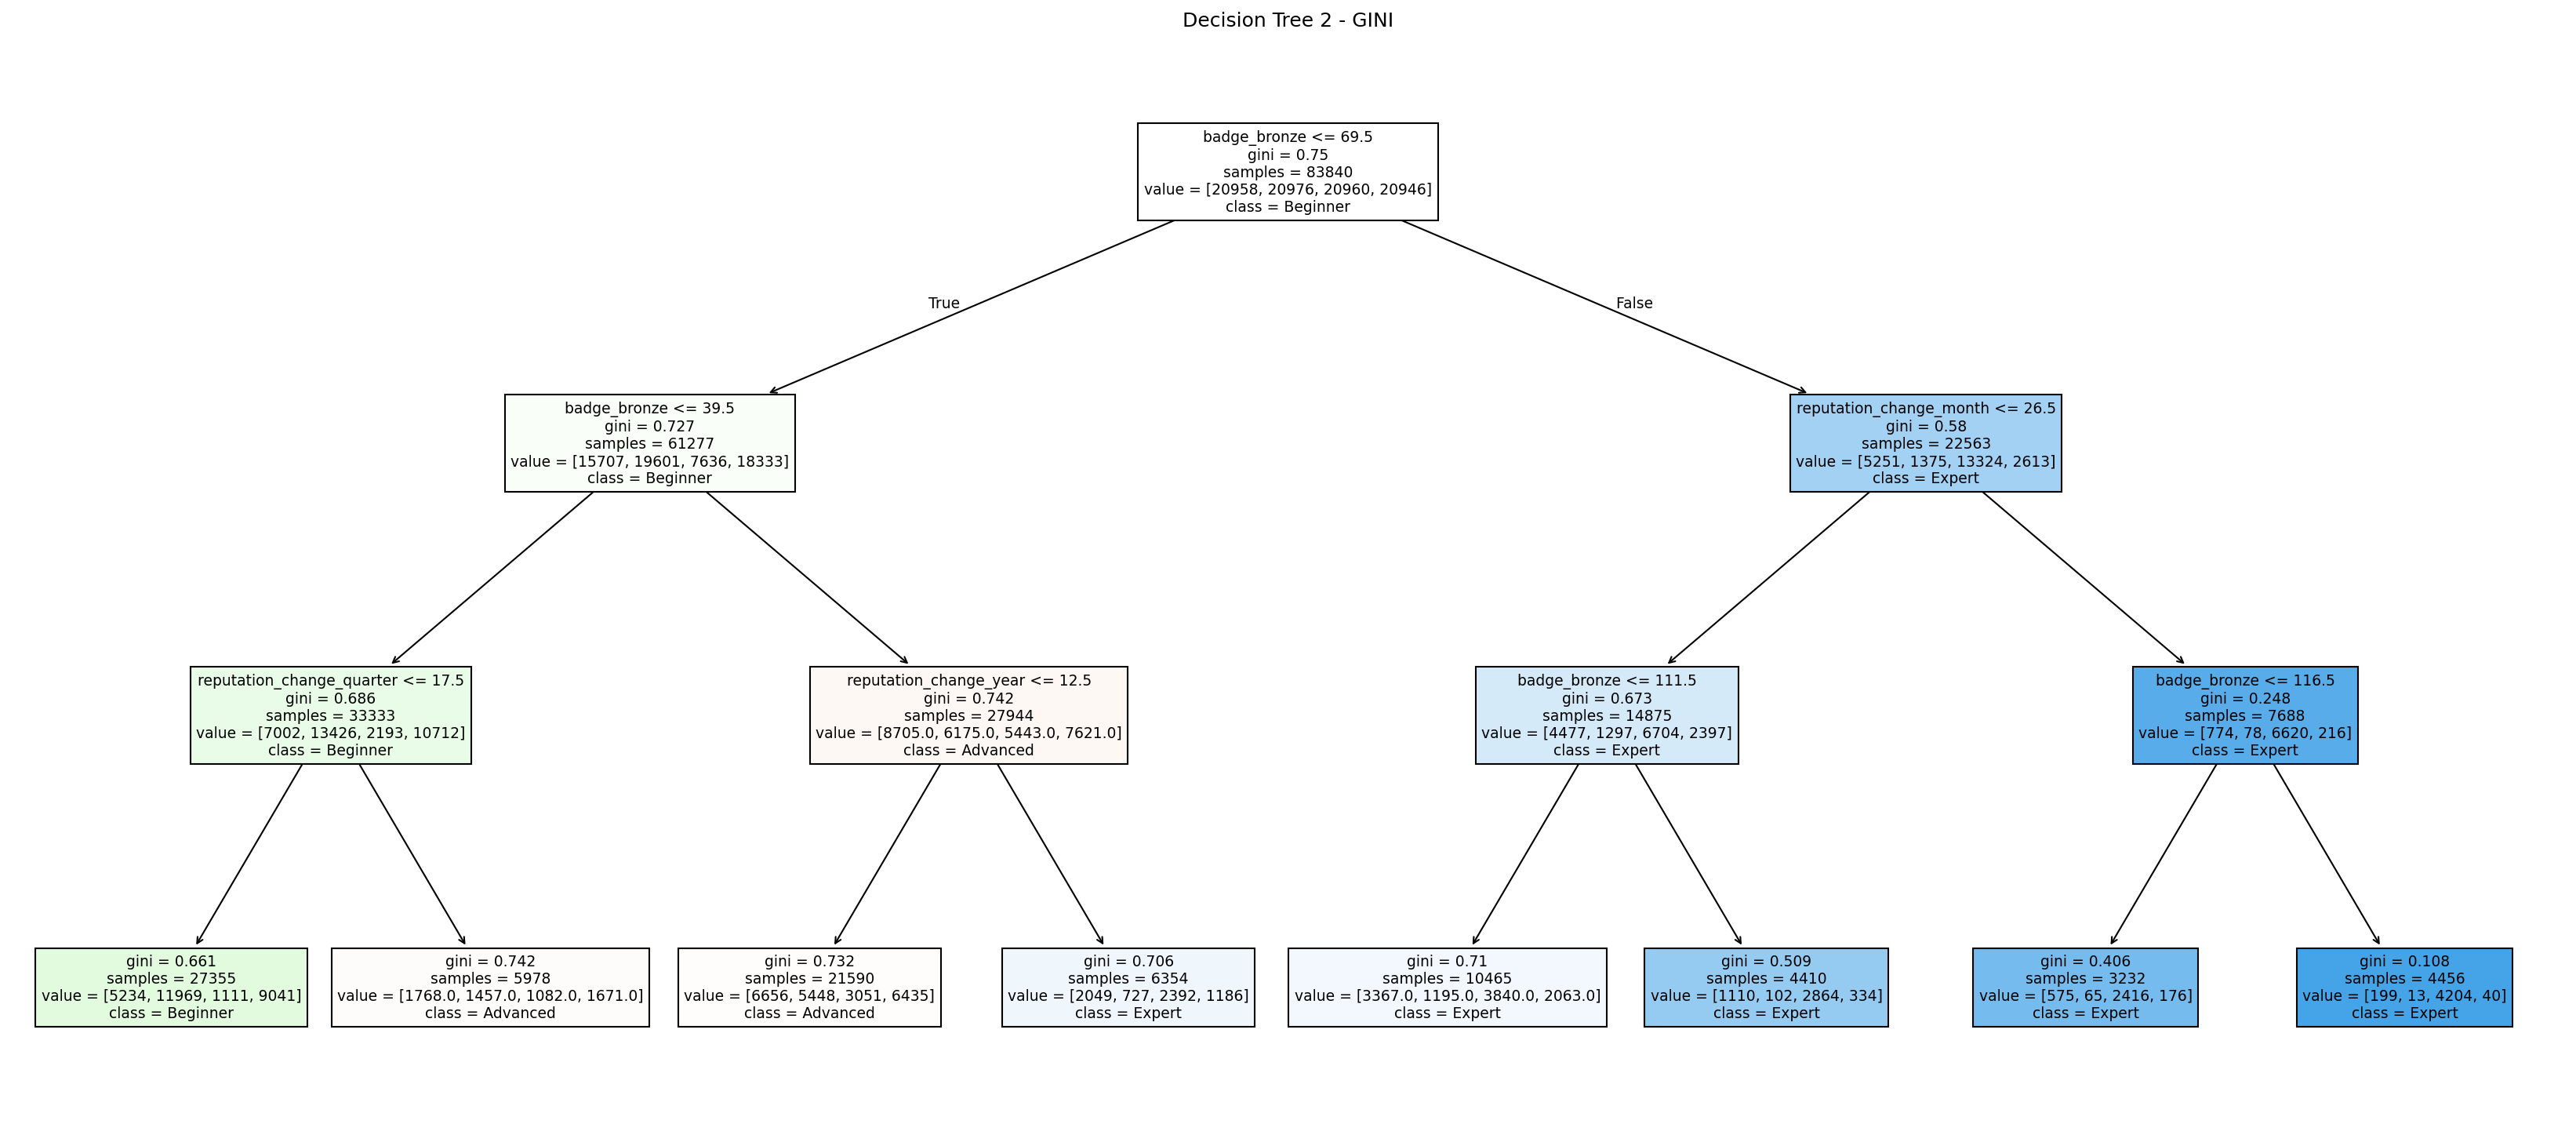

In [67]:
# Drop root1 and split
X2 = X.drop(columns=[root1])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, stratify=y, random_state=42)

clf2 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf2.fit(X2_train, y2_train)

y_pred2 = clf2.predict(X2_test)
acc2 = accuracy_score(y2_test, y_pred2)
print(f"DT Model 2 - GINI Accuracy: {acc2:.4f}")

print("\nClassification Report:\n")
print(classification_report(y2_test, y_pred2, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_estimator(
    clf2, X2_test, y2_test, display_labels=label_encoder.classes_
).plot(cmap="Blues")
plt.title("Confusion Matrix - DT Model 2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(28, 12), dpi=150)
plot_tree(clf2, filled=True, feature_names=X2.columns, class_names=label_encoder.classes_, max_depth=3)
plt.title("Decision Tree 2 - GINI")
plt.show()


In the second decision tree model, one of the prominent features from the previous model was removed to examine how the model behaves with a different structure. The model was built using the GINI criterion and limited to a maximum depth of 3.

The overall accuracy was approximately 43%, which is slightly lower than that of the first model. The model performed relatively well in identifying Expert users, achieving the highest recall and precision in this category. It also showed moderate effectiveness in classifying Beginner users. However, the model struggled with the Advanced category and was unable to correctly classify any users in the Intermediate group.

The new root node of the decision tree was badge_bronze, indicating a shift in the primary decision-making feature after removing the original root. The tree structure shows a different pattern of splits compared to the previous model.

Overall, this version demonstrates how changes in input features can influence decision tree behavior and classification outcomes. While some classes were predicted reasonably well, others, especially mid-level expertise categories, continued to be challenging for the model.

#  DT Model 3 – Entropy (Drop Roots of Tree 1 & 2)

In [68]:
# Get root feature from clf1
root2 = X.columns[clf2.tree_.feature[0]]
print(f"Root feature of Tree 1: {root2}")

Root feature of Tree 1: badge_bronze


DT Model 3 - Entropy Accuracy: 0.4134

Classification Report:

              precision    recall  f1-score   support

    Advanced       0.34      0.17      0.22      5239
    Beginner       0.42      0.47      0.44      5244
      Expert       0.61      0.61      0.61      5240
Intermediate       0.29      0.41      0.34      5237

    accuracy                           0.41     20960
   macro avg       0.42      0.41      0.40     20960
weighted avg       0.42      0.41      0.40     20960



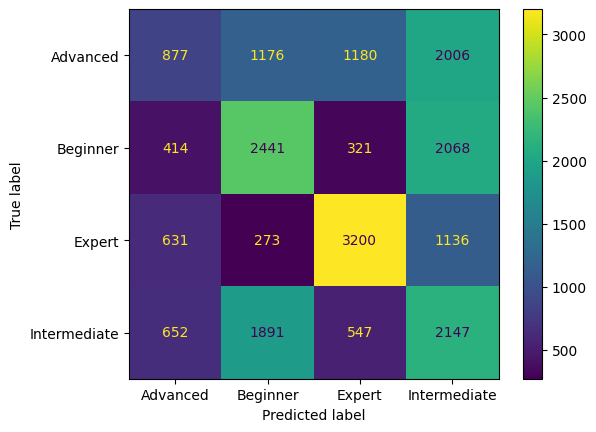

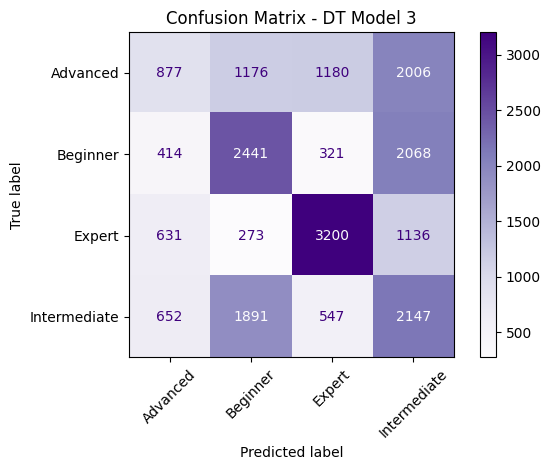

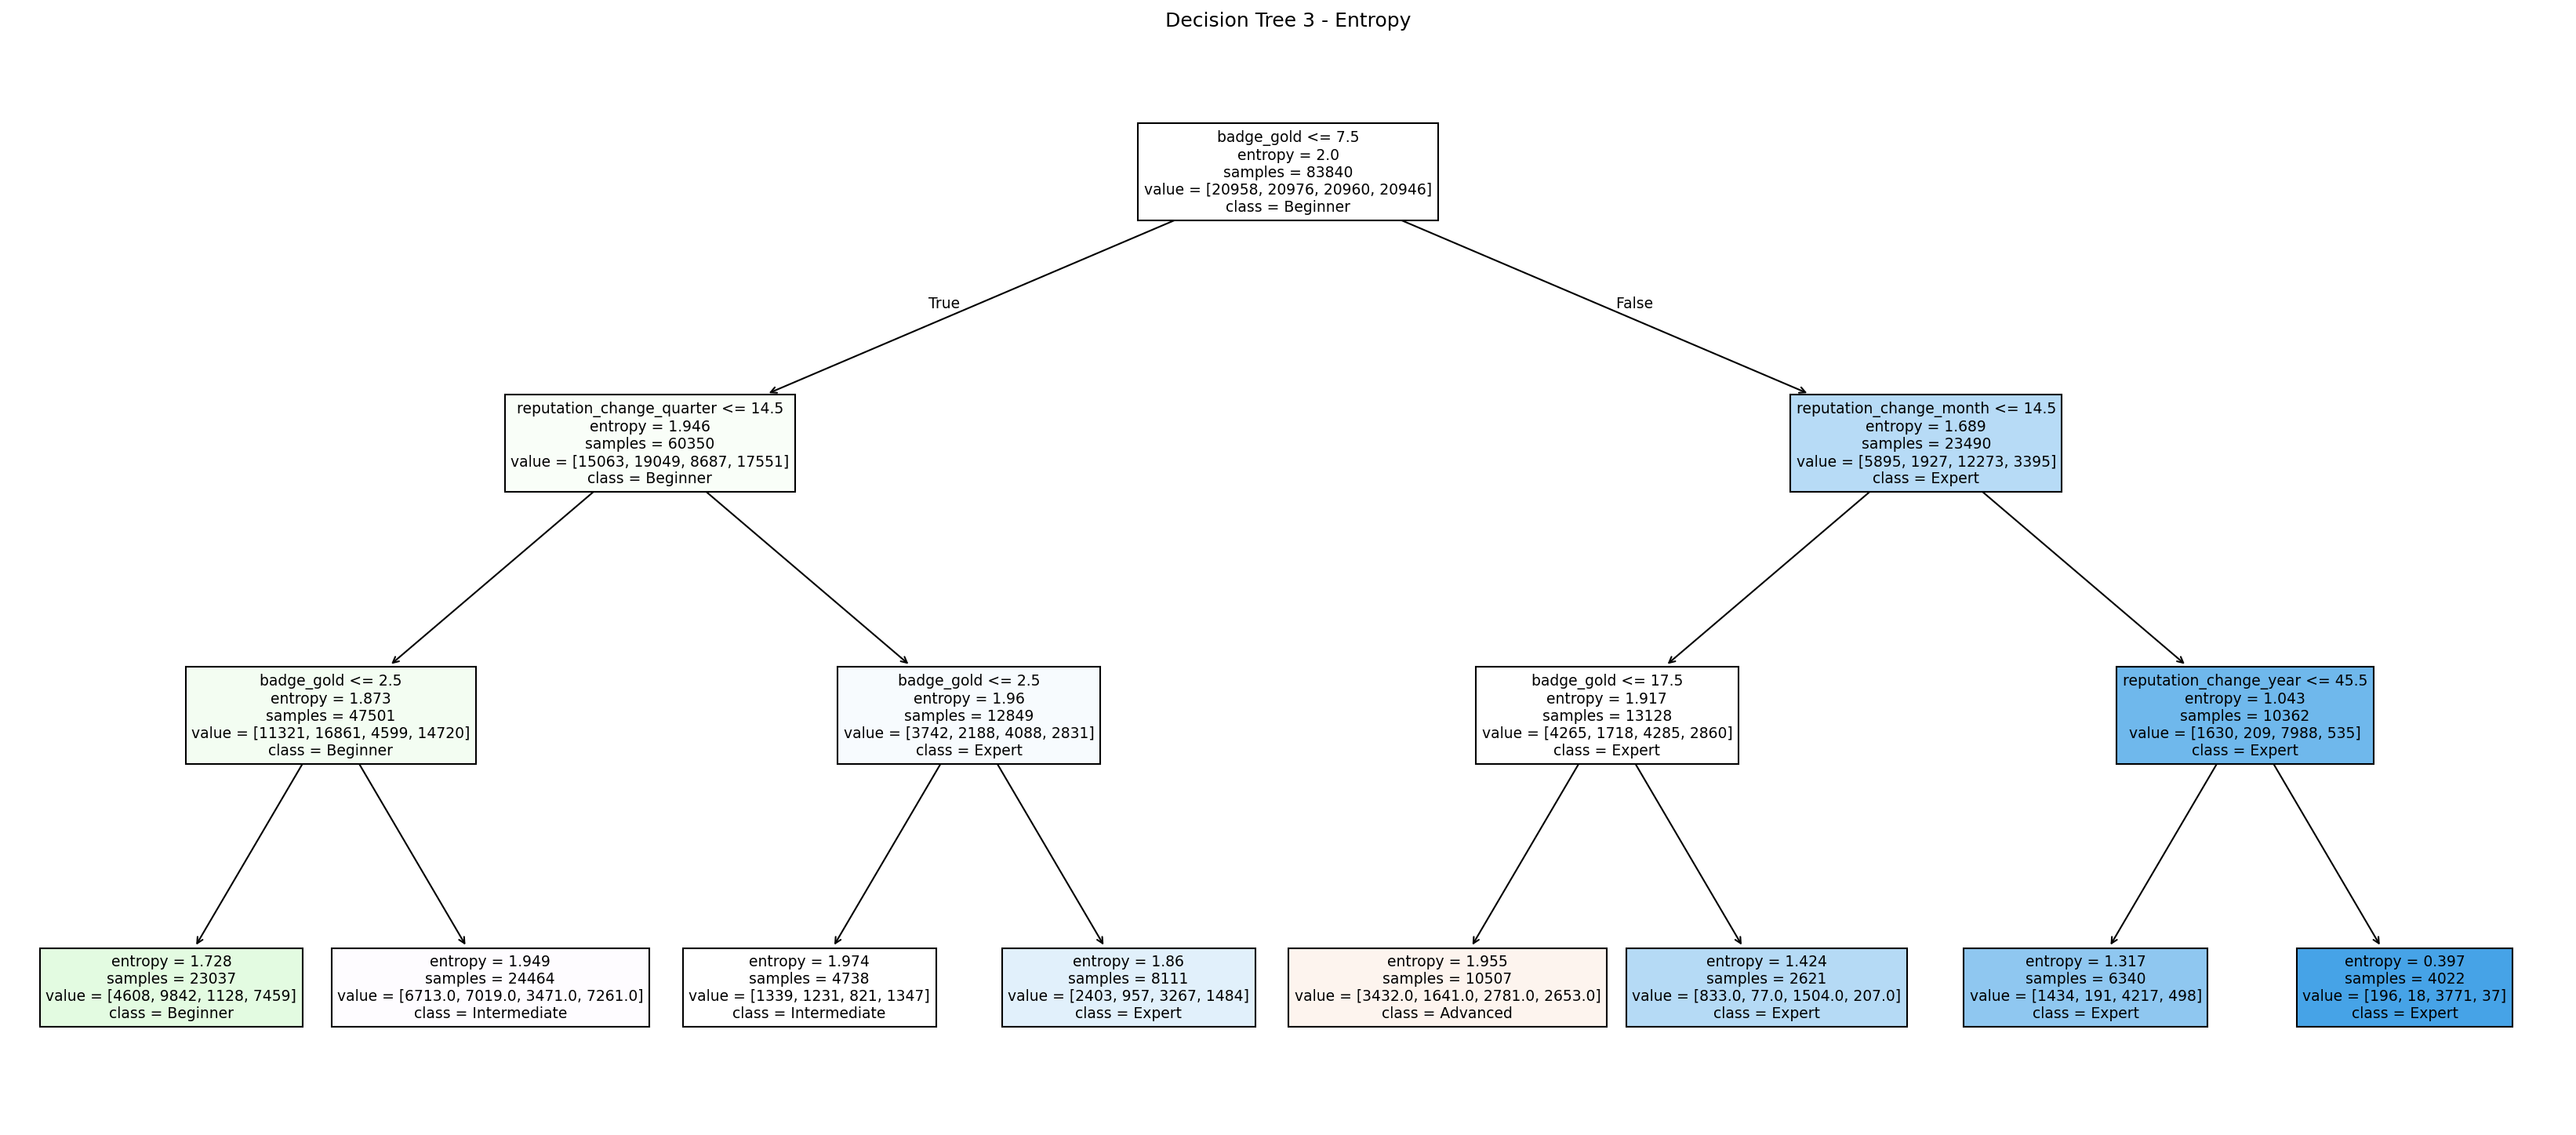

In [70]:
# Drop previous root features
X3 = X.drop(columns=[root1, root2])
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, stratify=y, random_state=42)

clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf3.fit(X3_train, y3_train)

y_pred3 = clf3.predict(X3_test)
acc3 = accuracy_score(y3_test, y_pred3)
print(f"DT Model 3 - Entropy Accuracy: {acc3:.4f}")

print("\nClassification Report:\n")
print(classification_report(y3_test, y_pred3, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_estimator(
    clf3, X3_test, y3_test, display_labels=label_encoder.classes_
).plot(cmap="Purples")
plt.title("Confusion Matrix - DT Model 3")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(28, 12), dpi=150)
plot_tree(clf3, filled=True, feature_names=X3.columns, class_names=label_encoder.classes_, max_depth=3)
plt.title("Decision Tree 3 - Entropy")
plt.show()

The third decision tree model used the Entropy criterion and was designed to ensure a different root node by excluding the most influential features from previous trees. This model achieved an overall accuracy of 41.34%, with a more balanced performance across classes compared to the earlier models.

The classification report shows that the Expert class had the best performance, with a precision and recall of 0.61, resulting in a strong F1-score. The Beginner class followed, with a recall of 0.47 and precision of 0.42, indicating that the model could reasonably identify users at the entry level. However, performance for Advanced users was limited, with only 17% recall, suggesting frequent misclassification. Interestingly, the model showed improved recognition of the Intermediate class (recall: 0.41), which earlier models struggled to detect, though the precision remained moderate.

The root feature selected by the model was badge_gold, with subsequent splits involving reputation_change_month, reputation_change_quarter, and reputation_change_year, showing the importance of both recognition (badges) and temporal activity patterns in classifying users.

In summary, while the model’s accuracy was comparable to the previous trees, it demonstrated improved balance between classes and highlighted different user behaviors by relying on a unique set of features, thanks to the Entropy-based splitting.